In [3]:
from sklearn.datasets import load_digits
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
digits=load_digits()

In [9]:
print("Image Data Shape",digits.data.shape)
print("Label Data Shape ",digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape  (1797,)


array([0, 1, 2, ..., 8, 9, 8])

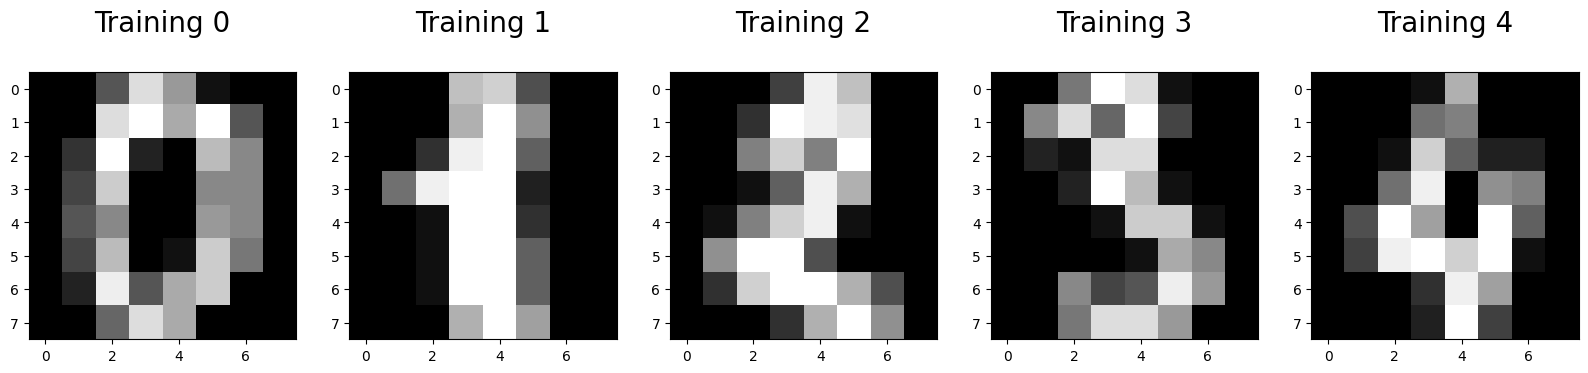

In [13]:
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title("Training %i\n"%label,fontsize=20)

In [14]:
#training and testing 
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)


In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1383, 64)
(414, 64)
(1383,)
(414,)


In [21]:
from sklearn.linear_model import LogisticRegression
logisticRegr=LogisticRegression()
logisticRegr.fit(X_train,y_train)

c:\Users\alich\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [25]:
#return a numpy array
#prediction for one observation
print(logisticRegr.predict(X_test[0].reshape(1,-1)))
#prediction for 10images
print(logisticRegr.predict(X_test[0:10]))
#prediction for testing 
y_pred=logisticRegr.predict(X_test)

[4]
[4 0 9 1 8 7 1 5 1 6]


In [26]:
#finding score
score=logisticRegr.score(X_test,y_test)
print(score)

0.9516908212560387


In [27]:
#using confusion matrix
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


Text(0.5, 1.0, 'Accuracy score: 0.9516908212560387')

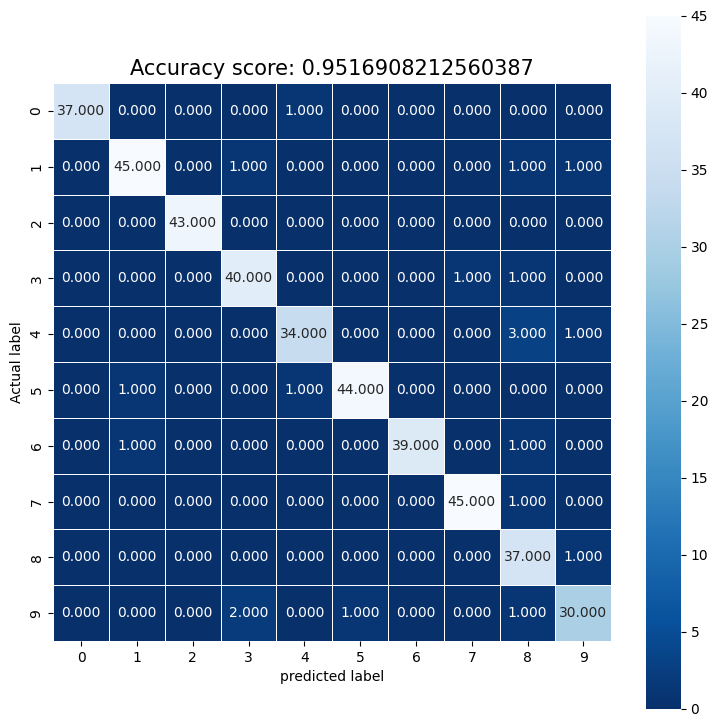

In [28]:
#confusion matrix in heatmap
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidths=.5,square=True,cmap="Blues_r")
plt.ylabel("Actual label")
plt.xlabel("predicted label")
all_sample_title='Accuracy score: {0}'.format(score)
plt.title(all_sample_title,size=15)

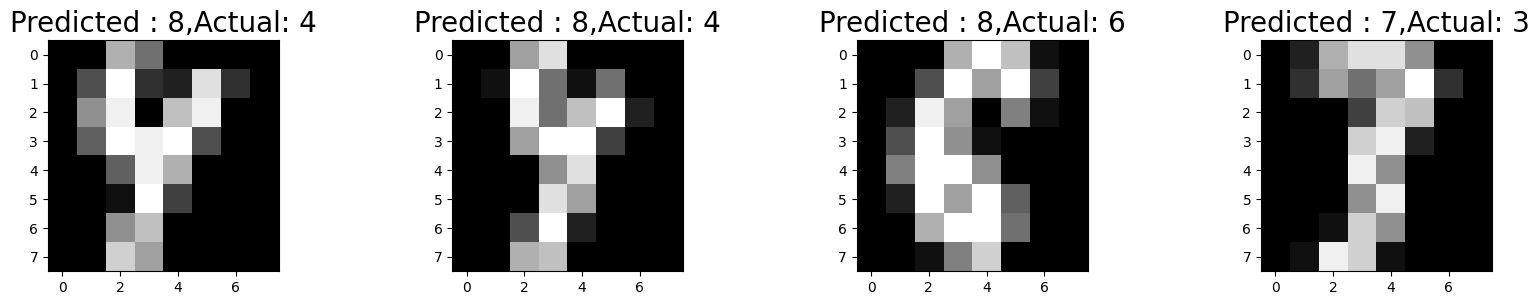

In [30]:
index=0
misclassifiedIndex=[]
for predict,actual in zip(y_pred,y_test):
    if predict!=actual:
        misclassifiedIndex.append(index)
    index+=1
plt.figure(figsize=(20,3))
for pltIndex,wrong in enumerate(misclassifiedIndex[0:4]):
    plt.subplot(1,4,pltIndex+1)
    plt.imshow(np.reshape(X_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title("Predicted : {},Actual: {}".format(y_pred[wrong],y_test[wrong]),fontsize=20)
